# Preamble

In [56]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
import pickle
from matplotlib.colors import BoundaryNorm
import glob
import pdb
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

import calendar
import sys
sys.path.append('/home/563/ab2313/MJO/functions')
import access_functions as af
import subphase_calc_functions as subphase_calc
import access_plot_functions as apf
import load_dataset as load
import phase_calc_functions as phase_calc
from importlib import reload

import subphase_calc_2 as sub2

In [57]:
load = reload(load)
awap, access, rmm_obs, rmm_access = load.load_accessifies_variables()

4159 4159
4159 4159


# AWAP Calculations

Splitting the normal events

In [58]:
subphase_calc = reload(subphase_calc)
# Split AWAP into the subphases: enhanced, suppressed, transition and inactive.
awap_split = subphase_calc.split_into_subphase(awap, rmm_obs)

In [59]:
awap_int, awap_anomaly =\
        sub2.extreme_intensity_and_anomly_month_subphase(awap_split, awap)

Now doing the same calculation but for extreme events

In [50]:
import subphase_calc_functions as scf

In [51]:
awap_90 = scf.unsplit_find_events_above_q(awap, 90)

In [52]:
awap_90_split = subphase_calc.split_into_subphase(awap_90, rmm_obs)

In [53]:
sub2 = reload(sub2)
# (data_split, data_total)
awap_int_90, awap_anomaly_90 =\
        sub2.extreme_intensity_and_anomly_month_subphase(awap_90_split, awap_90)

# Extreme Rainfall

## ACCESS Calculations

In [54]:
savedir = 'plots_2/intensity/90/'

In [13]:
sub2 = reload(sub2)
af = reload(af)


q = 90

int_stor_90 = []
anom_stor_90 = []
    
# Looping through ensemble
for ensemble in access.ensemble.values:
    
    # Selecting a single ensemble
    access_single = access.sel(ensemble = ensemble)
    
    # Getting extrreme events
    access_90_single = scf.unsplit_find_events_above_q(access_single, 90)
    
    
    # Splitting the rainfall in to the 9 mjo phases
    access_90_split = subphase_calc.split_into_subphase(access_90_single, rmm_single)
    access_split = subphase_calc.split_into_subphase(access_single, rmm_single)
    
    # Calculating the index for a single ensemble
    access_int_norm_single_90, access_anomaly_norm_single_90 = \
                sub2.extreme_intensity_and_anomly_month_subphase(access_90_split, access_90_single,climatology = 0)
    
    
    int_stor_90.append(access_int_norm_single_90)
    
    # For some reason the 11th ensebmle maintain the ensemble dimensin (???)
#     if ensemble == 11:
#         access_anomaly_norm_single = access_anomaly_norm_single.drop('ensemble')
    
    anom_stor_90.append(access_anomaly_norm_single_90)

    
    
# Storing all the results in a xarray files.
access_int_total_90 = xr.concat(int_stor_90, dim = 'ensemble')
access_anom_total_90 = xr.concat(anom_stor_90, dim = 'ensemble')

In [14]:
# Taking the mean across all ensembles

access_int_mean_90 = access_int_total_90.mean(dim = 'ensemble').compute()

access_anom_mean_90 = access_anom_total_90.mean(dim = 'ensemble').compute()

## Map Plots

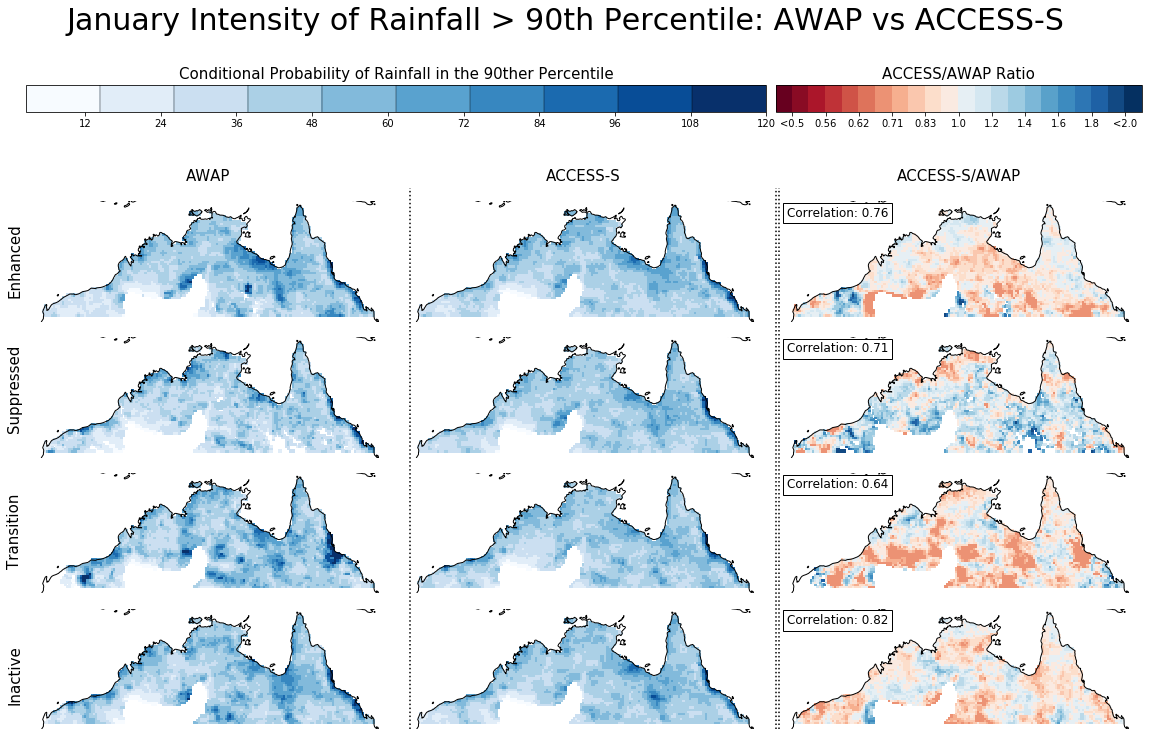

In [30]:
apf = reload(apf) 
apf.comparison_plot(awap_int_90, access_int_mean_90, month = 1,
                    plot_max = 120,  vmax = 2.1, add_white = 0,
                    rain_type = 'Intensity of Rainfall > 90th Percentile',
                   cbar1_title = 'Intensity of Rainfall in the 90th Percentile (mm)', 
                    cbar2_title = 'ACCESS/AWAP Ratio',
                    savedir = savedir, savefig = 0
                  )

October Intensity of Rainfall > 90th Percentile: AWAP vs ACCESS-S has been saved
November Intensity of Rainfall > 90th Percentile: AWAP vs ACCESS-S has been saved
December Intensity of Rainfall > 90th Percentile: AWAP vs ACCESS-S has been saved
January Intensity of Rainfall > 90th Percentile: AWAP vs ACCESS-S has been saved
February Intensity of Rainfall > 90th Percentile: AWAP vs ACCESS-S has been saved
March Intensity of Rainfall > 90th Percentile: AWAP vs ACCESS-S has been saved


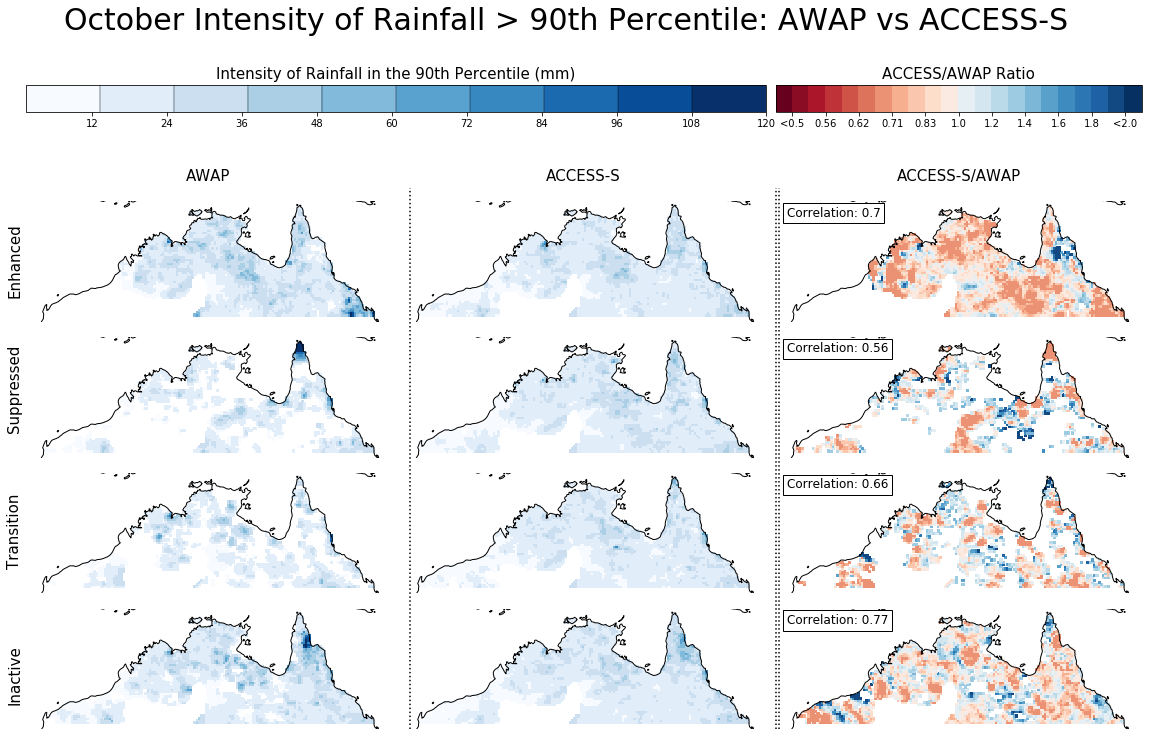

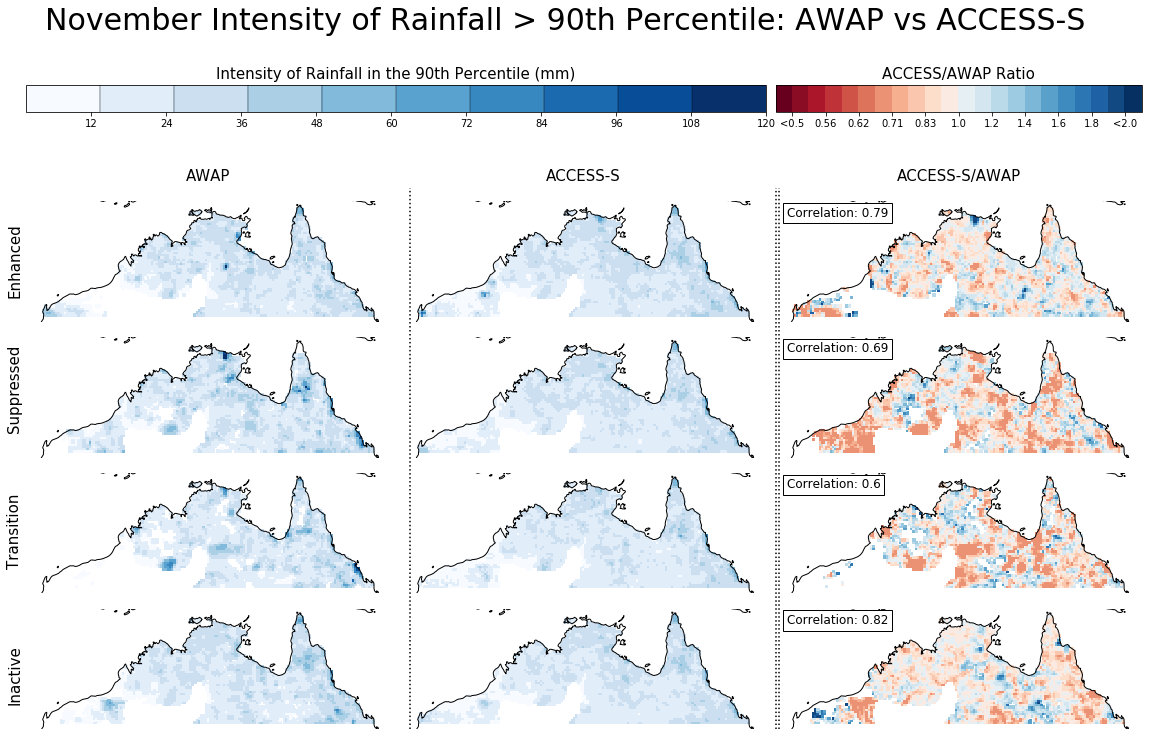

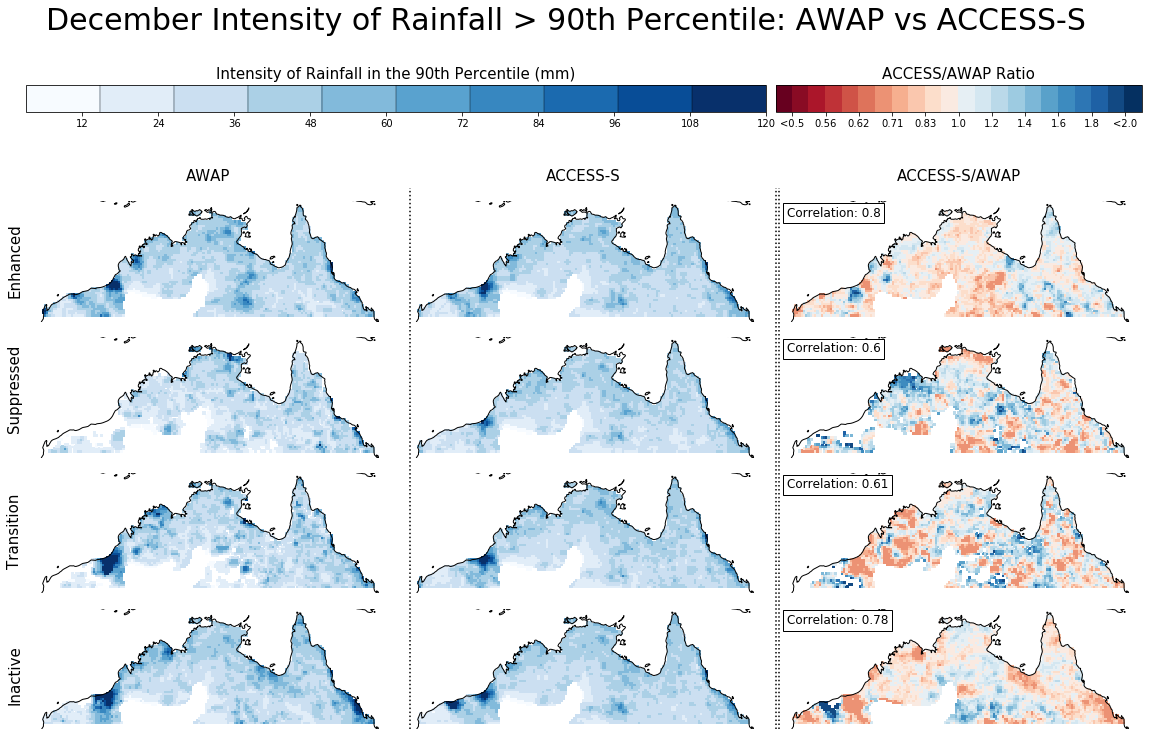

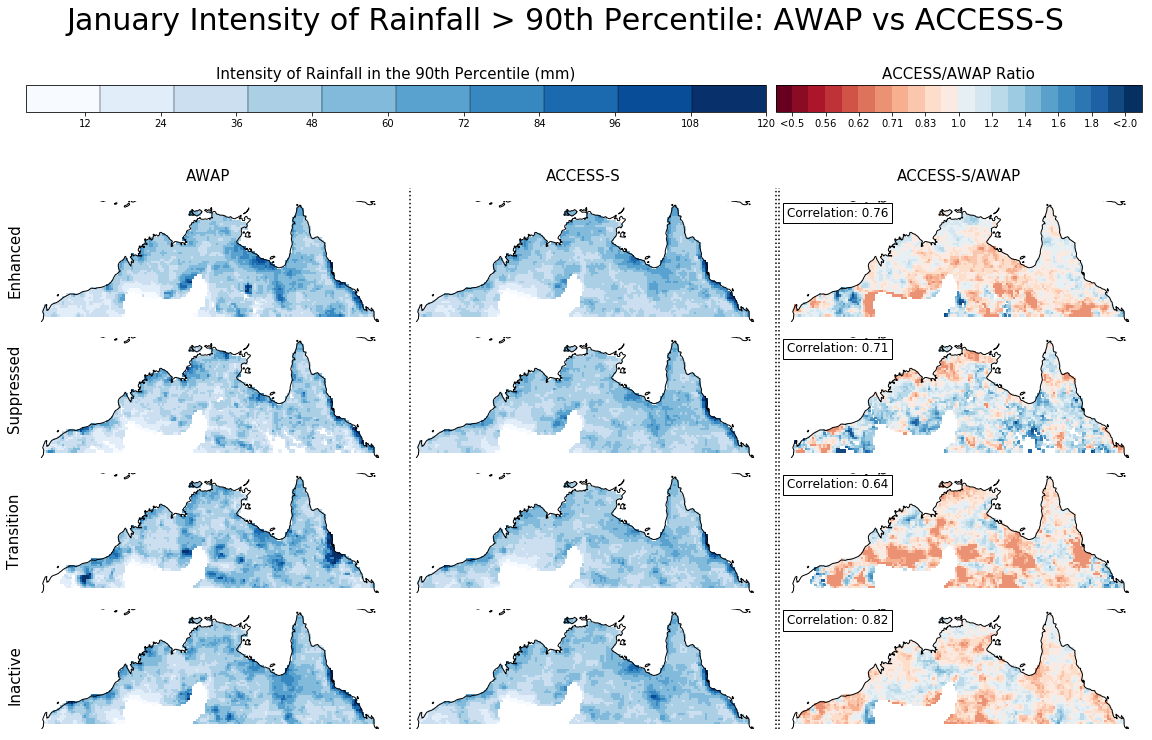

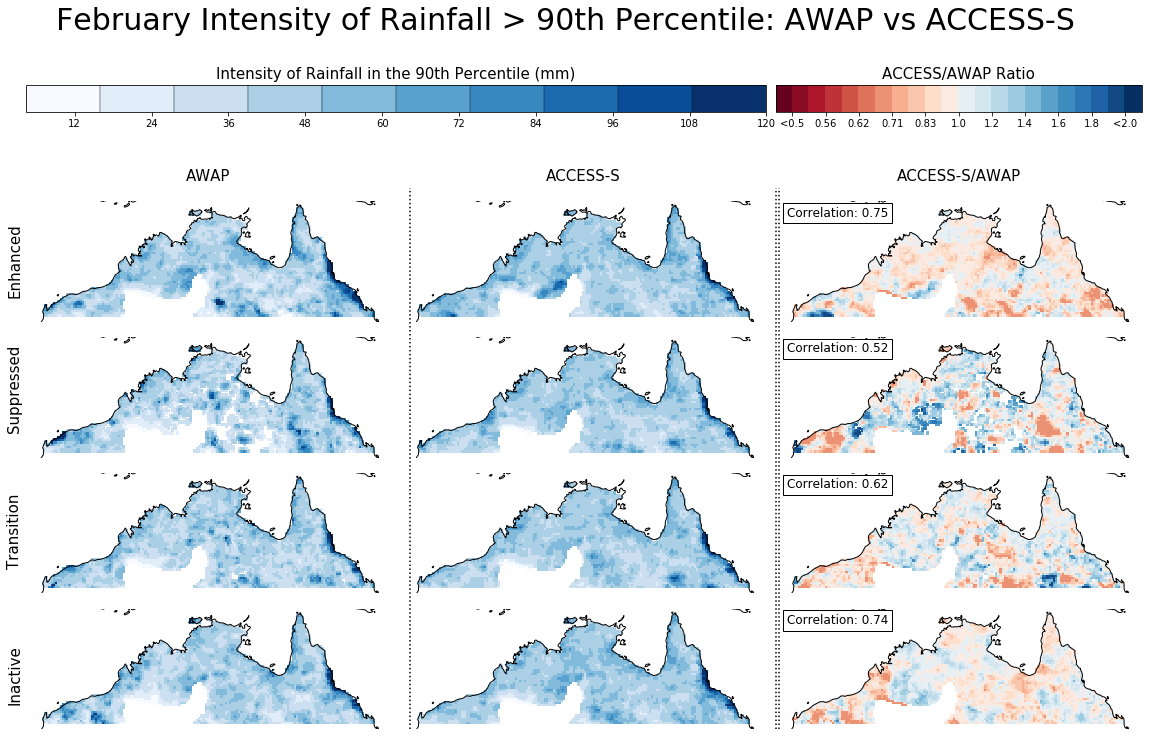

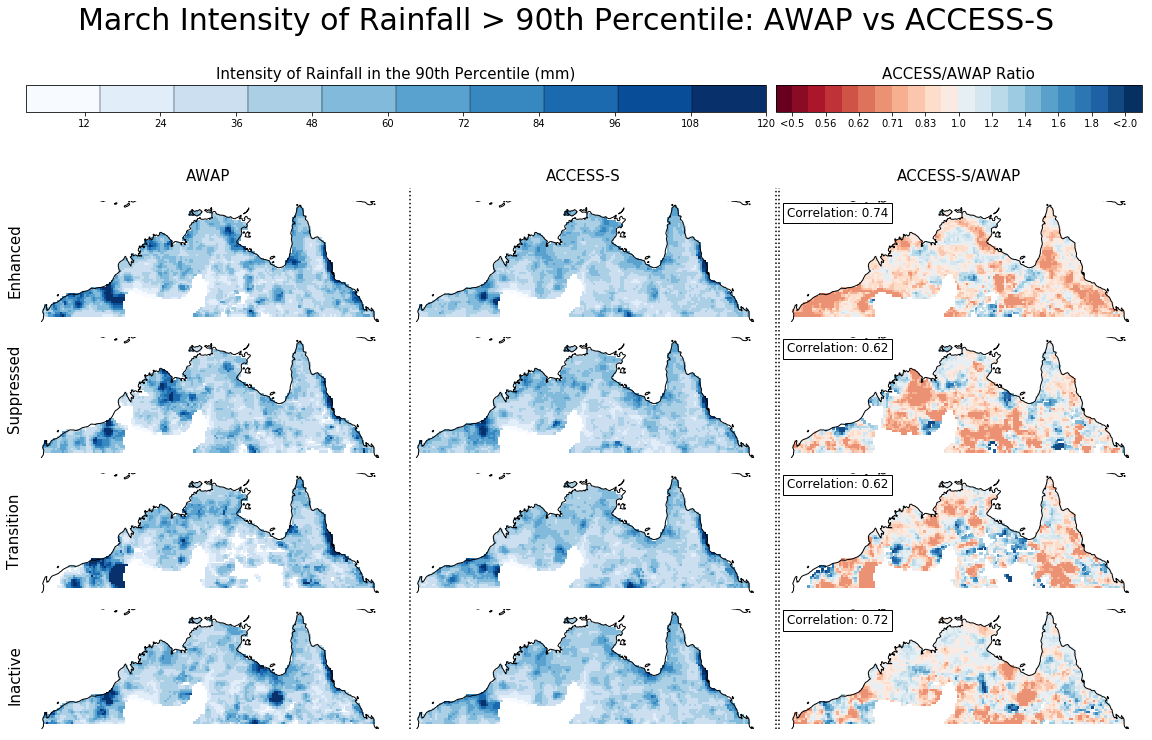

In [46]:
apf = reload(apf) 
for month in [10,11,12,1,2,3]:
    

    apf.comparison_plot(awap_int_90, access_int_mean_90, month = month,
                    plot_max = 120,  vmax = 2.1, add_white = 0,
                    rain_type = 'Intensity of Rainfall > 90th Percentile',
                   cbar1_title = 'Intensity of Rainfall in the 90th Percentile (mm)', 
                    cbar2_title = 'ACCESS/AWAP Ratio',
                    savedir = savedir, savefig = 1
                  )

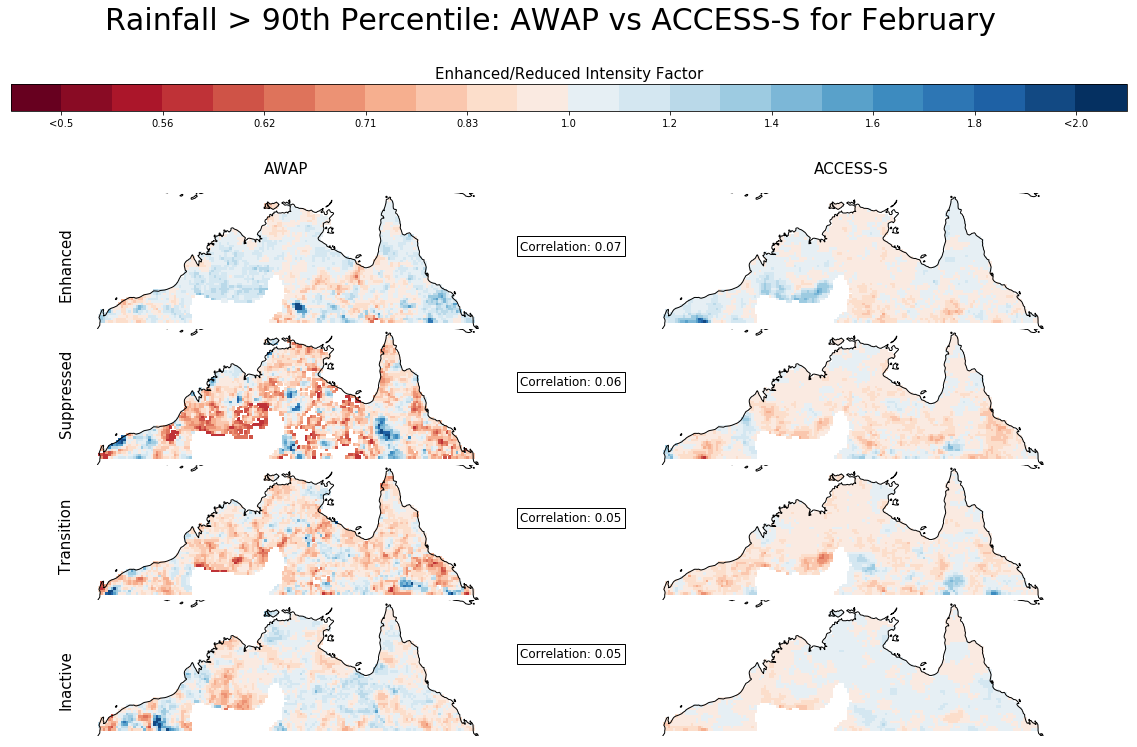

In [36]:
apf = reload(apf)
apf.anomaly_plot_subphases(awap_anomaly_90,access_anom_mean_90 , month = 2
                          ,vmax = 2.1, cbar_title = 'Enhanced/Reduced Intensity Factor',
                          rain_type = 'Rainfall > 90th Percentile',
                          savedir = savedir, savefig = 0)

Rainfall > 90th Percentile: AWAP vs ACCESS-S for October has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for November has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for December has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for January has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for February has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for March has been saved


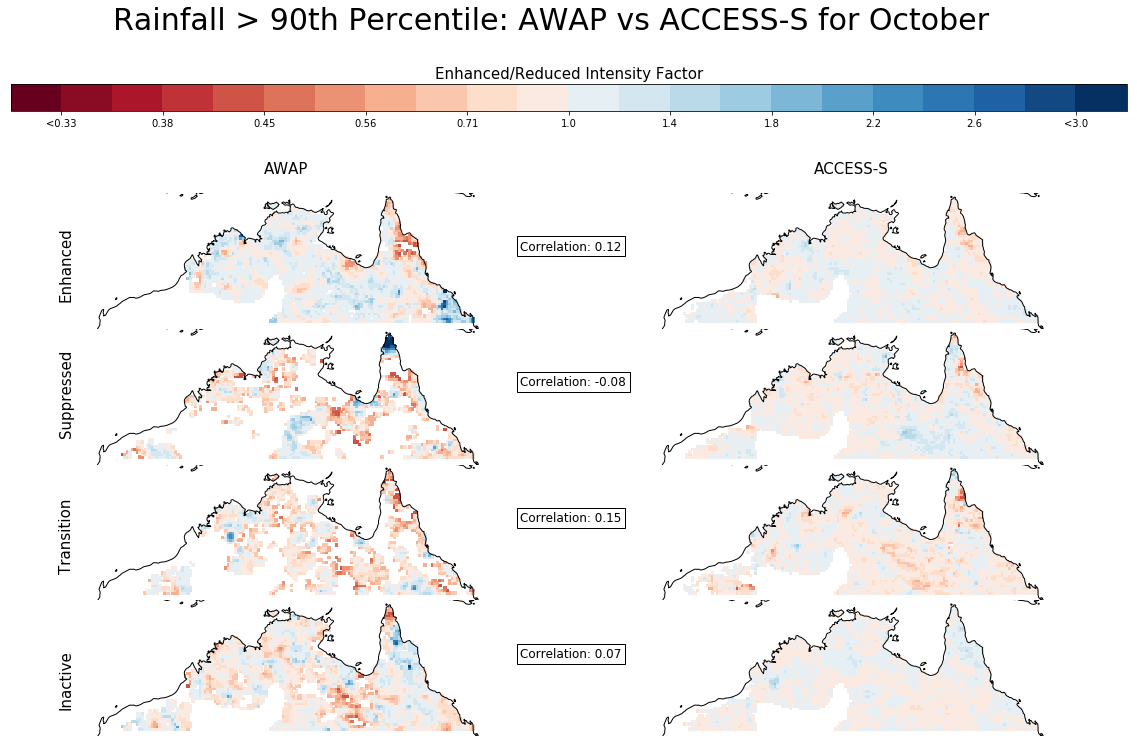

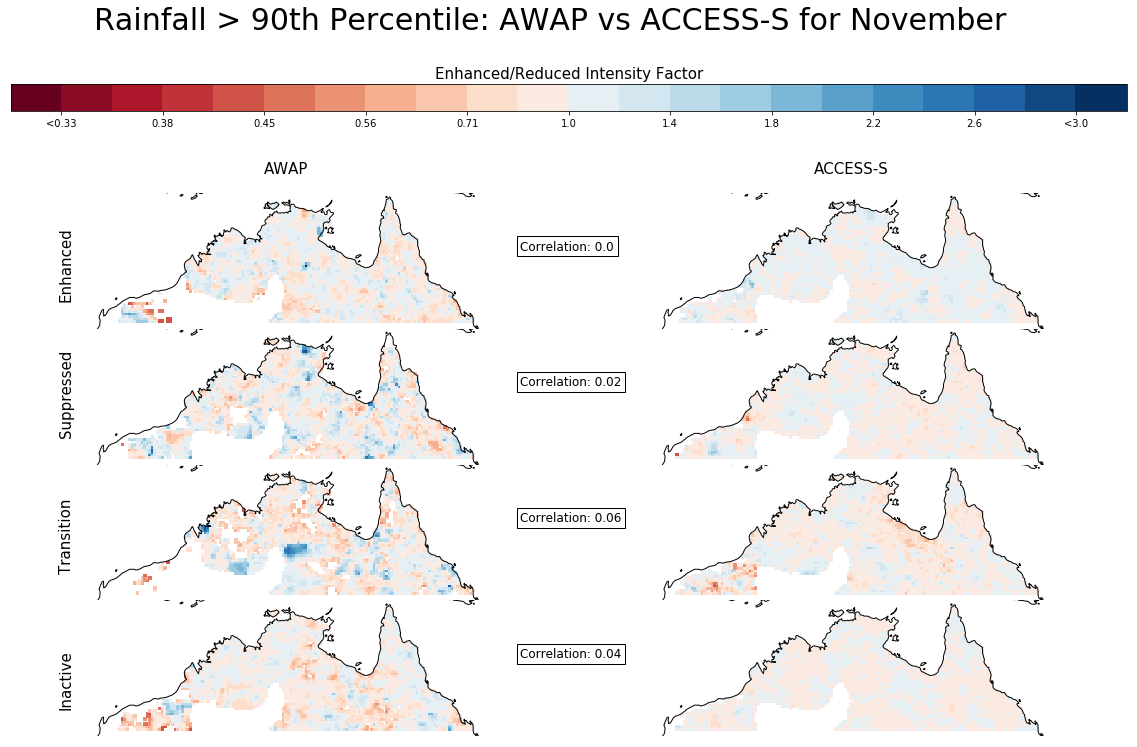

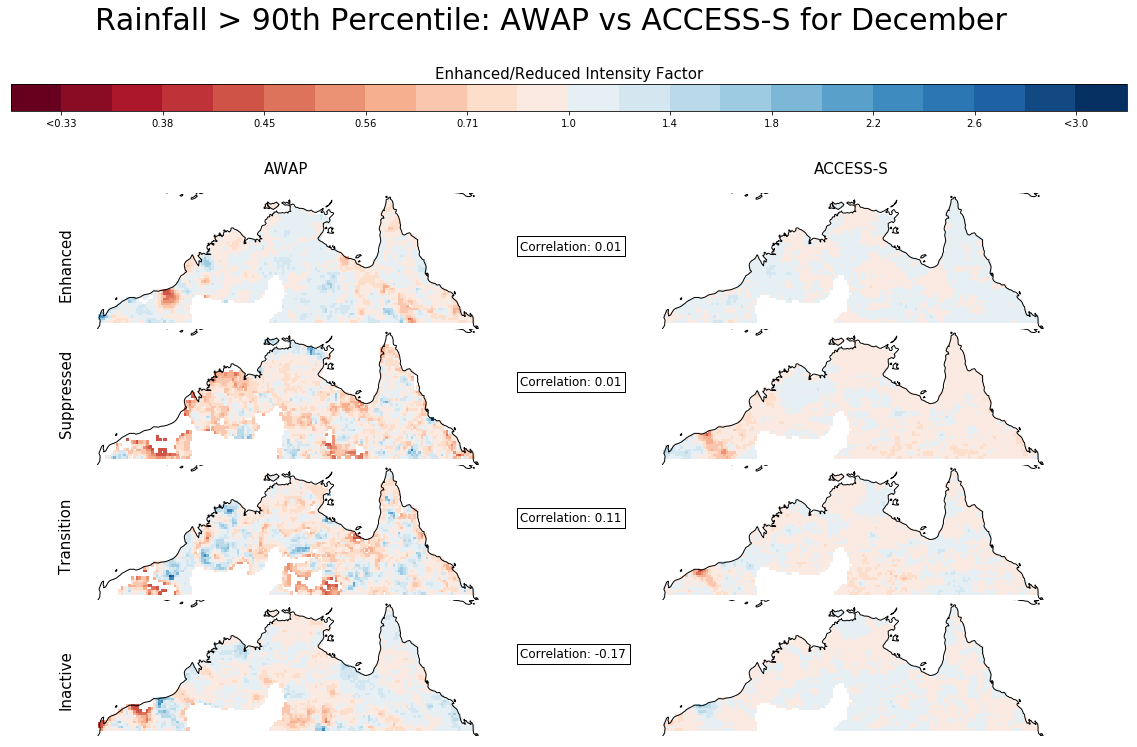

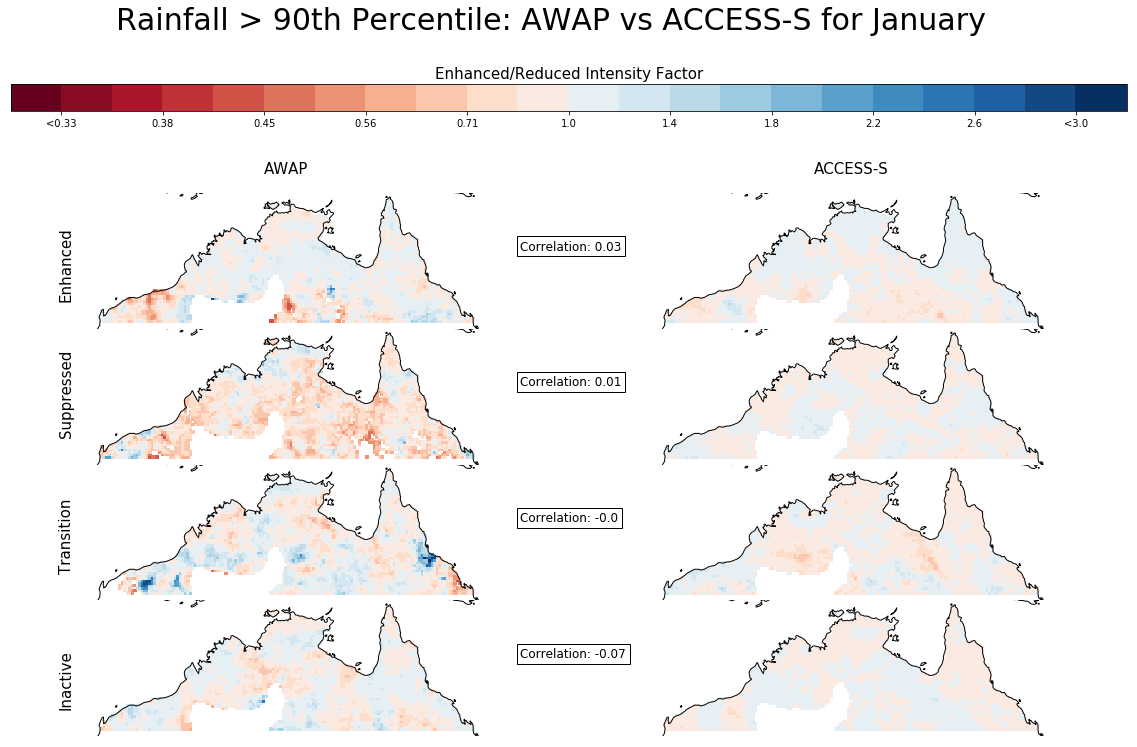

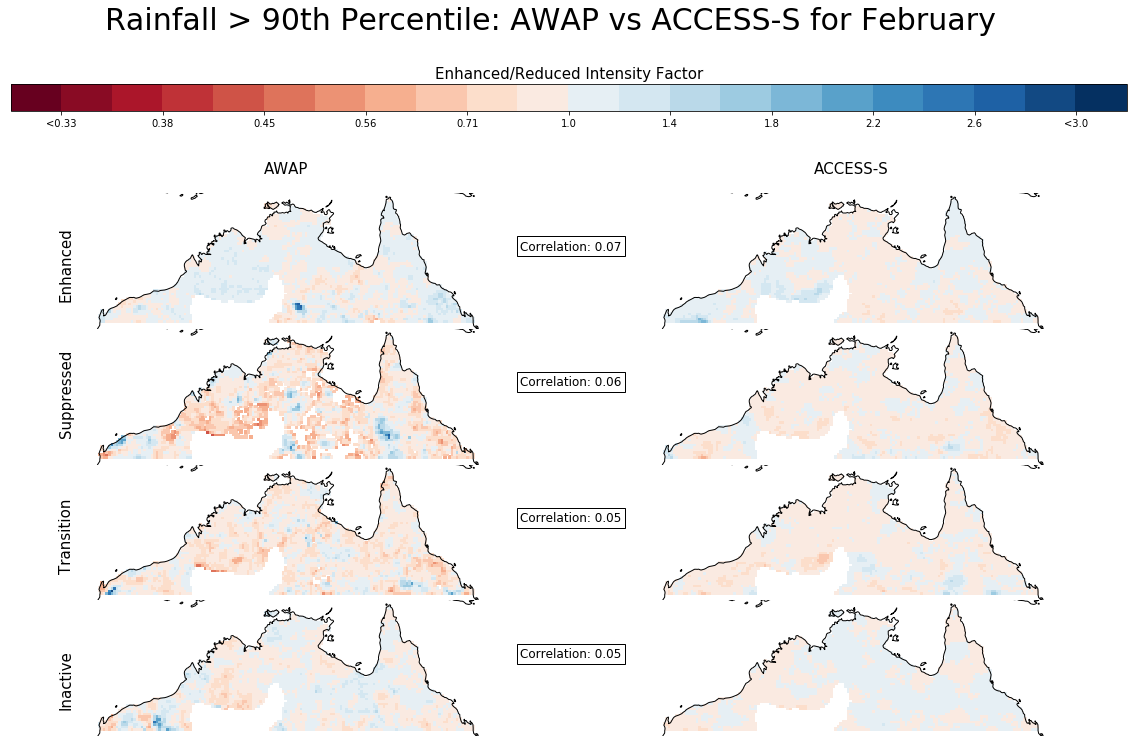

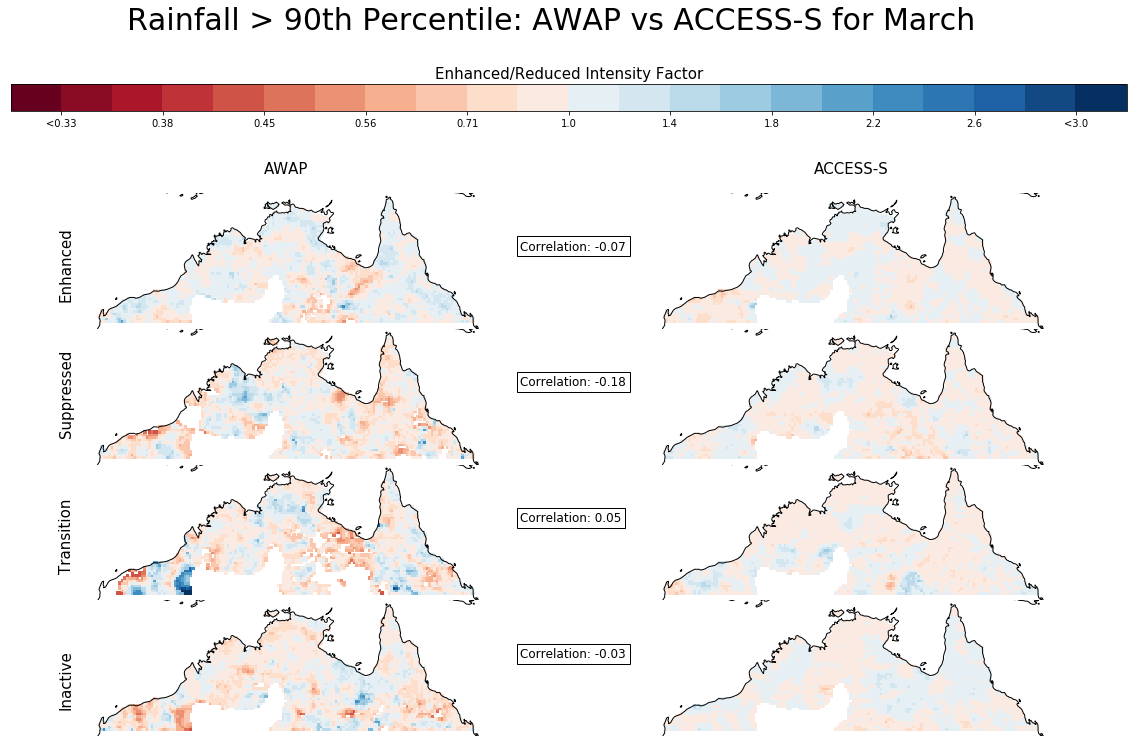

In [34]:
for month in [10,11,12,1,2,3]:
    apf.anomaly_plot_subphases(awap_anomaly_90,access_anom_mean_90 , month = month
                          ,vmax = 3.2, cbar_title = 'Enhanced/Reduced Intensity Factor',
                          rain_type = 'Rainfall > 90th Percentile',
                          savedir = savedir, savefig = 1)

## Timeseries Correlations

In [37]:
af = reload(af)
pattern_correlation_90 = af.month_pattern_correlations(awap_int_90, access_int_mean_90)

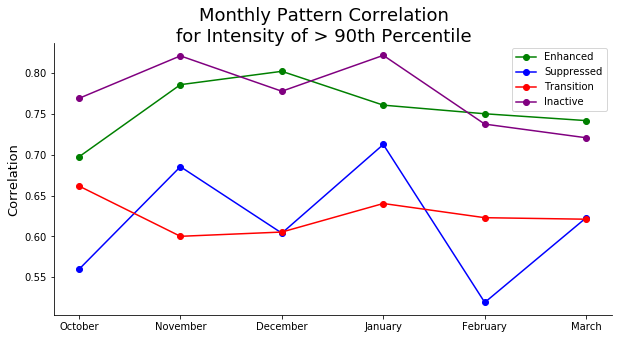

In [38]:
apf = reload(apf)

title = 'Monthly Pattern Correlation\nfor Intensity of > 90th Percentile'

apf.timeseries_pattern_correlation_plot(pattern_correlation_90,title = title, custom  = 0, 
                                        savefig = 1, savedir = savedir)

In [39]:
af = reload(af)
anomaly_patterns_90 = af.month_pattern_correlations(awap_anomaly_90,access_anom_mean_90)

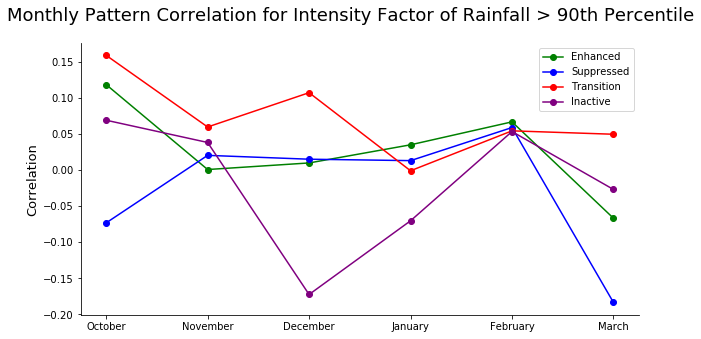

In [40]:
apf = reload(apf)

title = 'Monthly Pattern Correlation for Intensity Factor of Rainfall > 90th Percentile'

apf.timeseries_pattern_correlation_plot(anomaly_patterns_90,title = title, custom  = 0, 
                                        savefig = 1, savedir = savedir)

<br>
Correlation of the raw count index with awap
<br> <br>
<br>


In [41]:
af = reload(af)
ensemble_raw_correlation_90 = af. list_pattern_correlation(awap_int_90, int_stor_90)

In [42]:
import access_plot_functions_2 as afp2

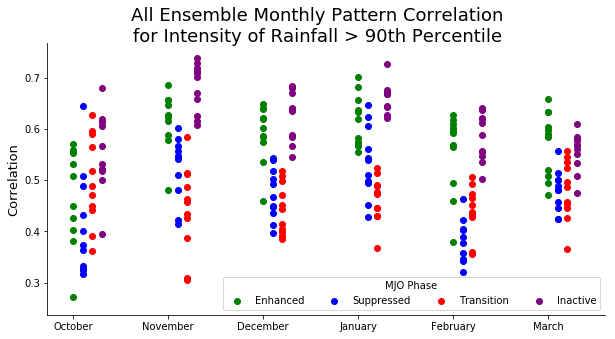

In [43]:
afp2 = reload(afp2)

title = 'All Ensemble Monthly Pattern Correlation\nfor Intensity of Rainfall > 90th Percentile'
afp2.stacked_patter_correlation_timeseries(ensemble_raw_correlation_90, title = title,
                                           savefig = 1, savedir = savedir)

In [44]:
af = reload(af)
ensemble_anom_correlation_90 = af. list_pattern_correlation(awap_anomaly_90, anom_stor_90)

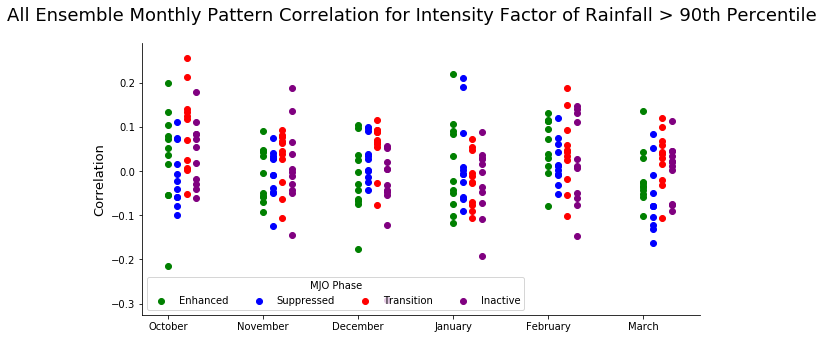

In [45]:
afp2 = reload(afp2)
title = title = 'All Ensemble Monthly Pattern Correlation for Intensity Factor of Rainfall > 90th Percentile'

afp2.stacked_patter_correlation_timeseries(ensemble_anom_correlation_90, title = title,
                                           savefig = 1, savedir = savedir)

# All Events (mm/day)

## ACCESS Calculations

In [75]:
savedir = 'plots_2/intensity/all/'

In [64]:
sub2 = reload(sub2)
af = reload(af)

int_stor = []
anom_stor = []
    
# Looping through ensemble
for ensemble in access.ensemble.values:
    
    # Selecting a single ensemble
    access_single = access.sel(ensemble = ensemble)
    
    # Splitting the rainfall in to the 9 mjo phases
    access_split = subphase_calc.split_into_subphase(access_single, rmm_single)
    
    # Calculating the index for a single ensemble
    access_int_norm_single, access_anomaly_norm_single, climatology = \
                sub2.extreme_intensity_and_anomly_month_subphase(access_split, access_single, climatology = 1) # 
    
    
    int_stor.append(access_int_norm_single)
    
    # For some reason the 11th ensebmle maintain the ensemble dimensin (???)
#     if ensemble == 11:
#         access_anomaly_norm_single = access_anomaly_norm_single.drop('ensemble')
    
    anom_stor.append(access_anomaly_norm_single)

    
    
# Storing all the results in a xarray files.
access_int_total = xr.concat(int_stor, dim = 'ensemble')
access_anom_total = xr.concat(anom_stor, dim = 'ensemble')

In [65]:
# Taking the mean across all ensembles

access_int_mean = access_int_total.mean(dim = 'ensemble').compute()

access_anom_mean = access_anom_total.mean(dim = 'ensemble').compute()

## Map Plots

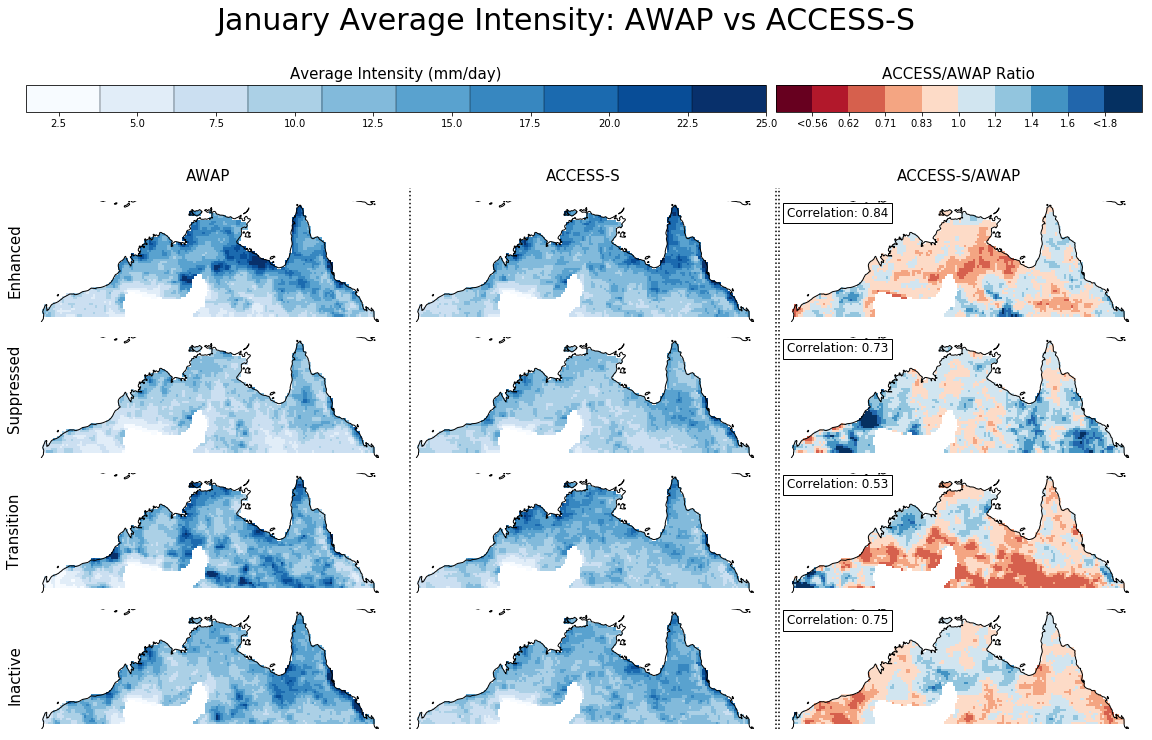

In [70]:
apf = reload(apf) 
apf.comparison_plot(awap_int, access_int_mean, month = 1,
                    plot_max = 25,  vmax = 2, add_white = 0,
                    rain_type = 'Average Intensity',
                   cbar1_title = 'Average Intensity (mm/day)', cbar2_title = 'ACCESS/AWAP Ratio',
                    savedir = savedir, savefig = 0
                  )

October Average Intensity: AWAP vs ACCESS-S has been saved
November Average Intensity: AWAP vs ACCESS-S has been saved
December Average Intensity: AWAP vs ACCESS-S has been saved
January Average Intensity: AWAP vs ACCESS-S has been saved
February Average Intensity: AWAP vs ACCESS-S has been saved
March Average Intensity: AWAP vs ACCESS-S has been saved


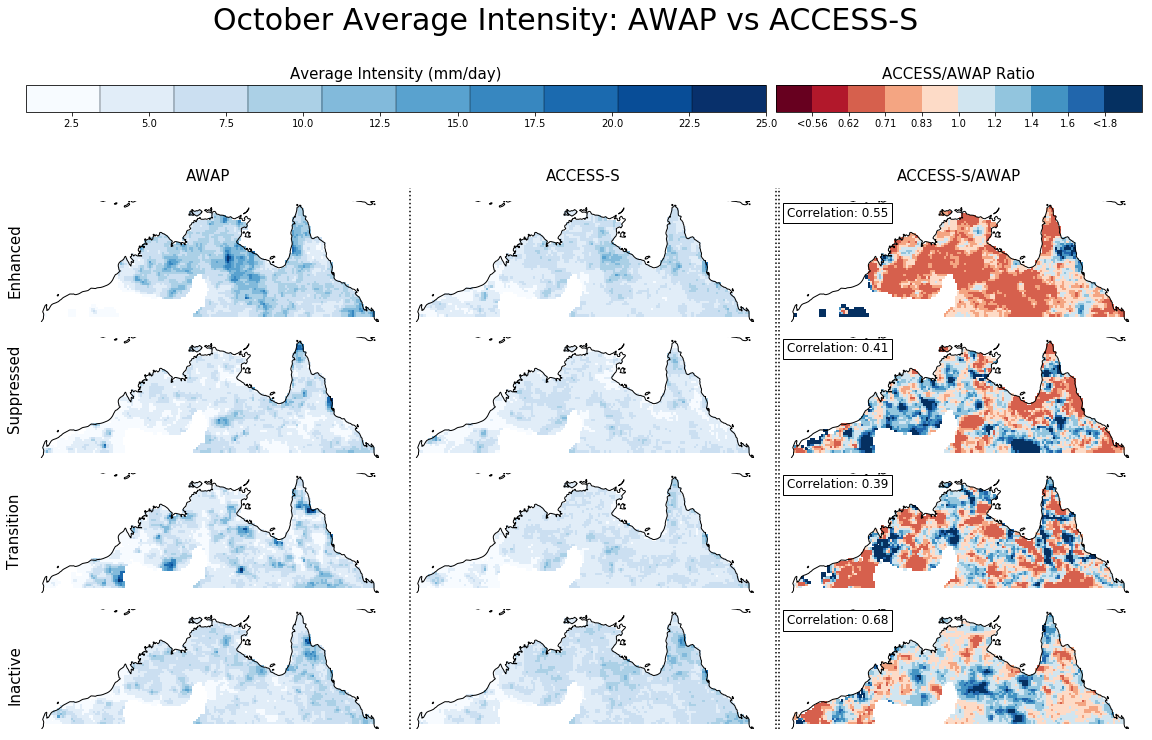

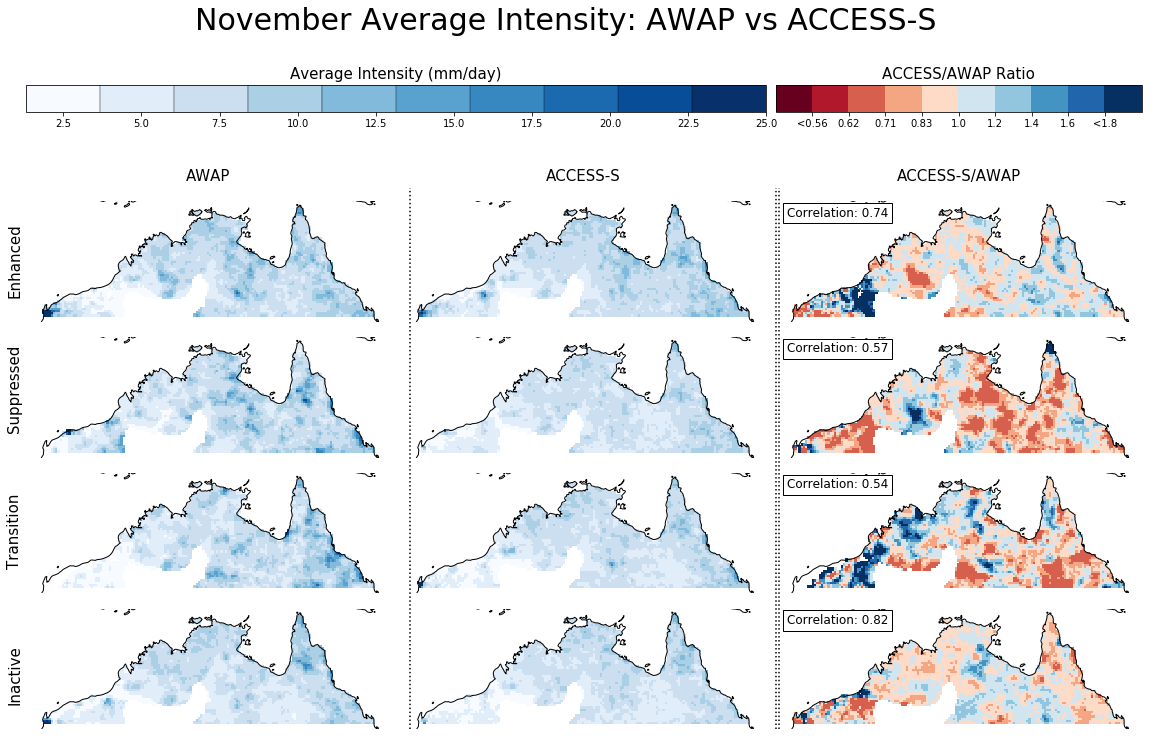

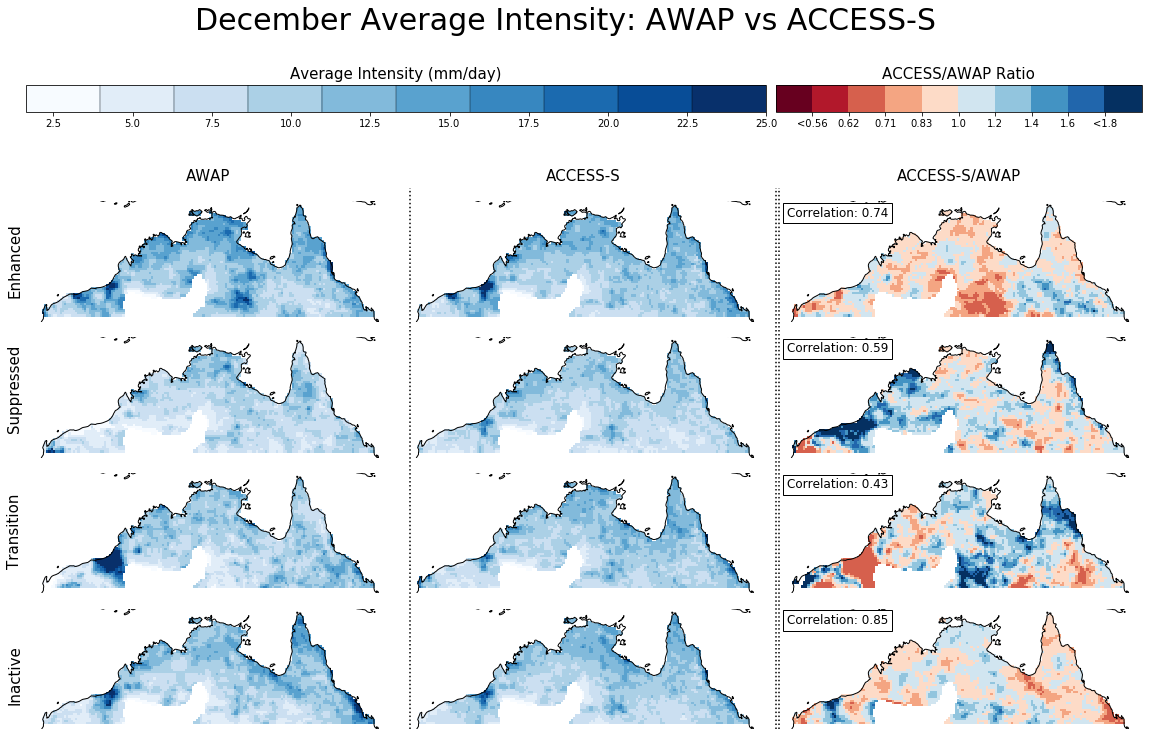

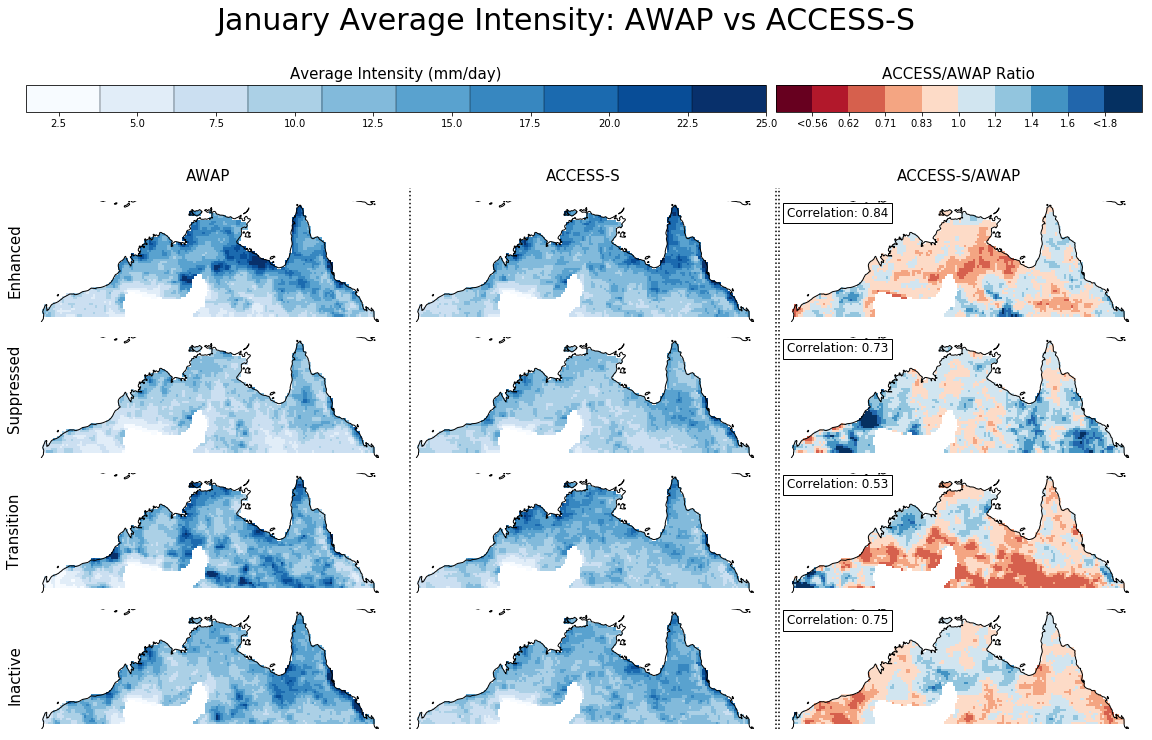

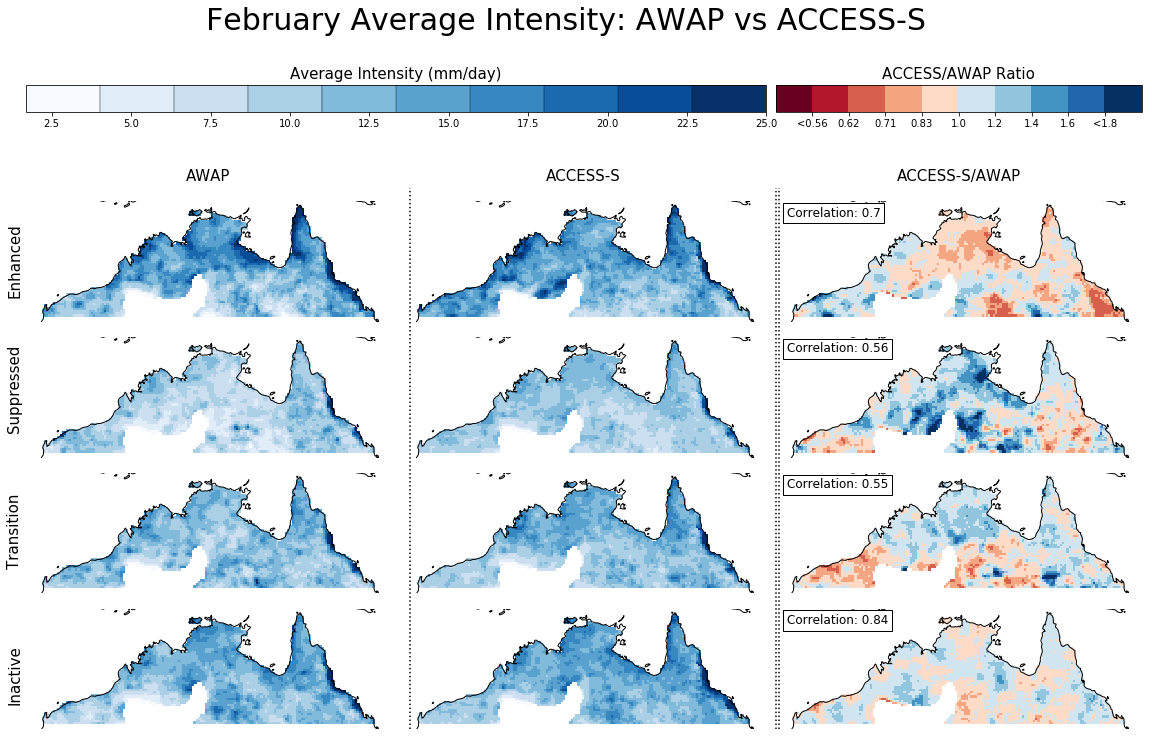

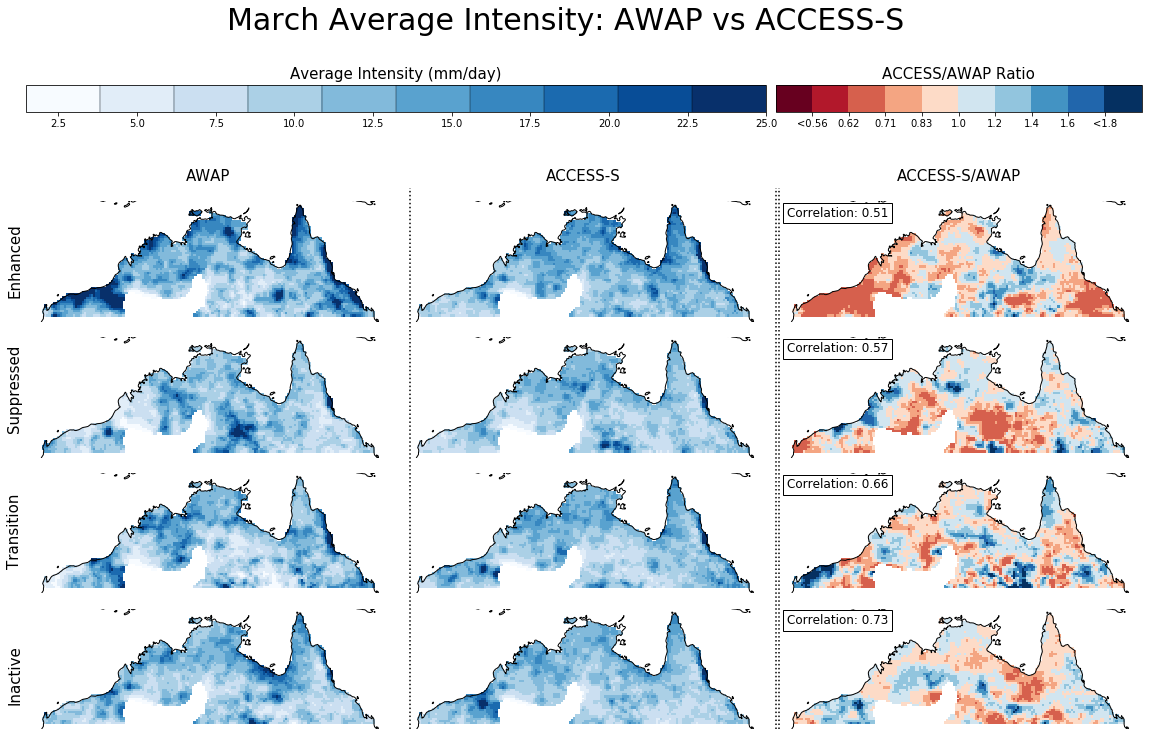

In [76]:
apf = reload(apf) 

for month in [10,11,12,1,2,3]:
    apf.comparison_plot(awap_int, access_int_mean, month = month,
                        plot_max = 25,  vmax = 2, add_white = 0,
                        rain_type = 'Average Intensity',
                       cbar1_title = 'Average Intensity (mm/day)', cbar2_title = 'ACCESS/AWAP Ratio',
                        savedir = savedir, savefig = 1
                      )

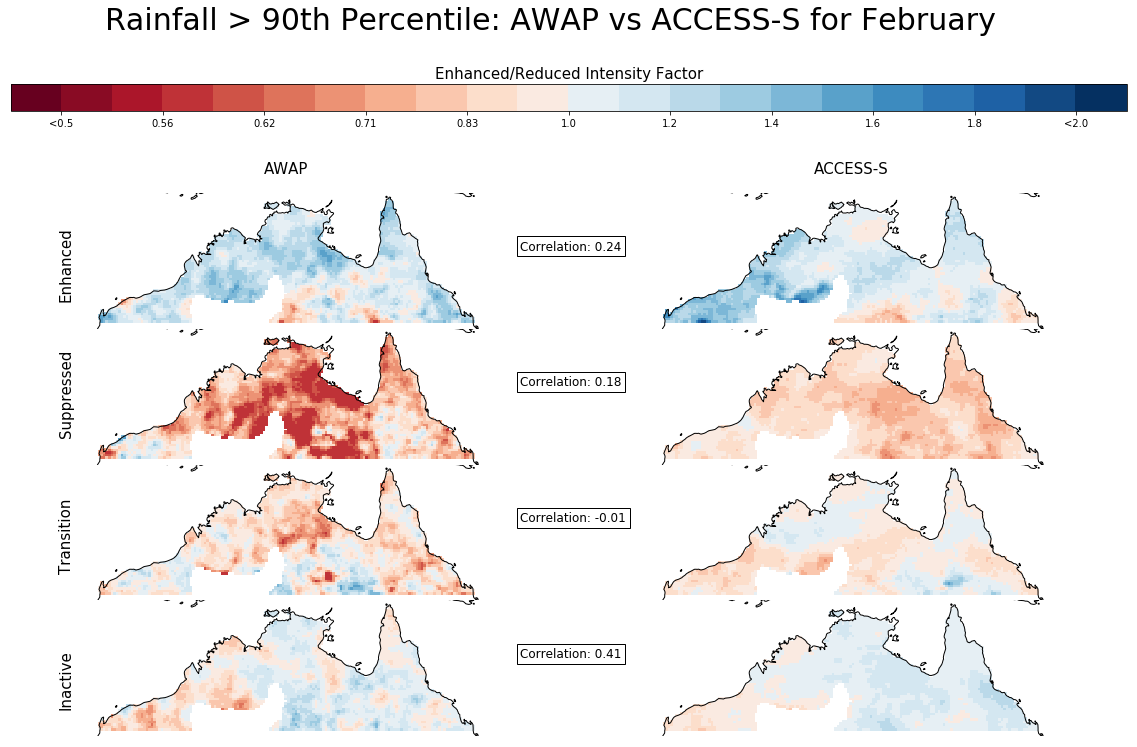

In [73]:
apf = reload(apf)
apf.anomaly_plot_subphases(awap_anomaly,access_anom_mean , month = 2
                          ,vmax = 2.1, cbar_title = 'Enhanced/Reduced Intensity Factor',
                          rain_type = 'Rainfall > 90th Percentile',
                          savedir = savedir, savefig = 0)

Rainfall > 90th Percentile: AWAP vs ACCESS-S for October has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for November has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for December has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for January has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for February has been saved
Rainfall > 90th Percentile: AWAP vs ACCESS-S for March has been saved


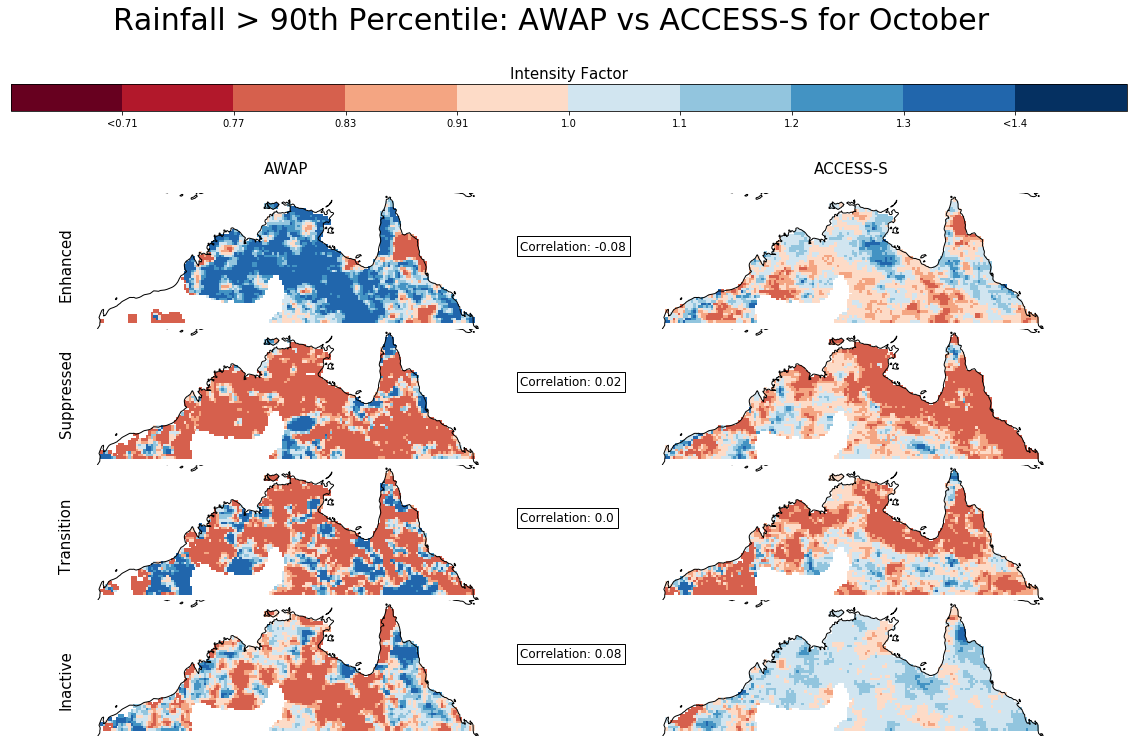

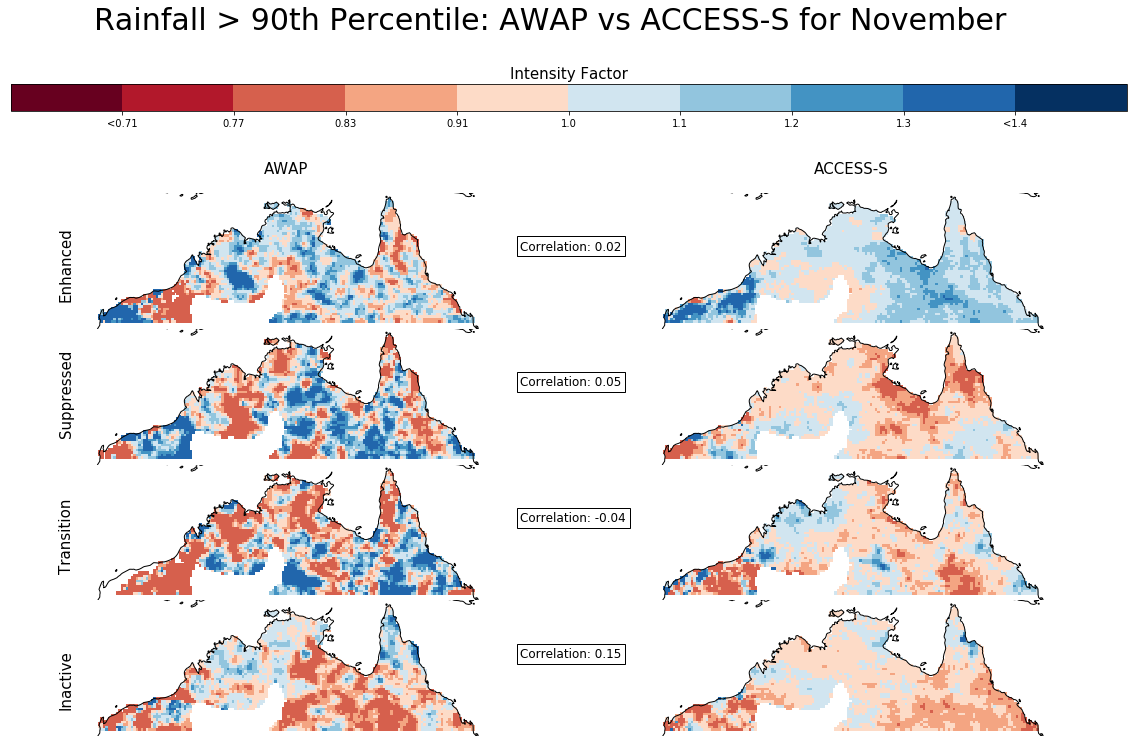

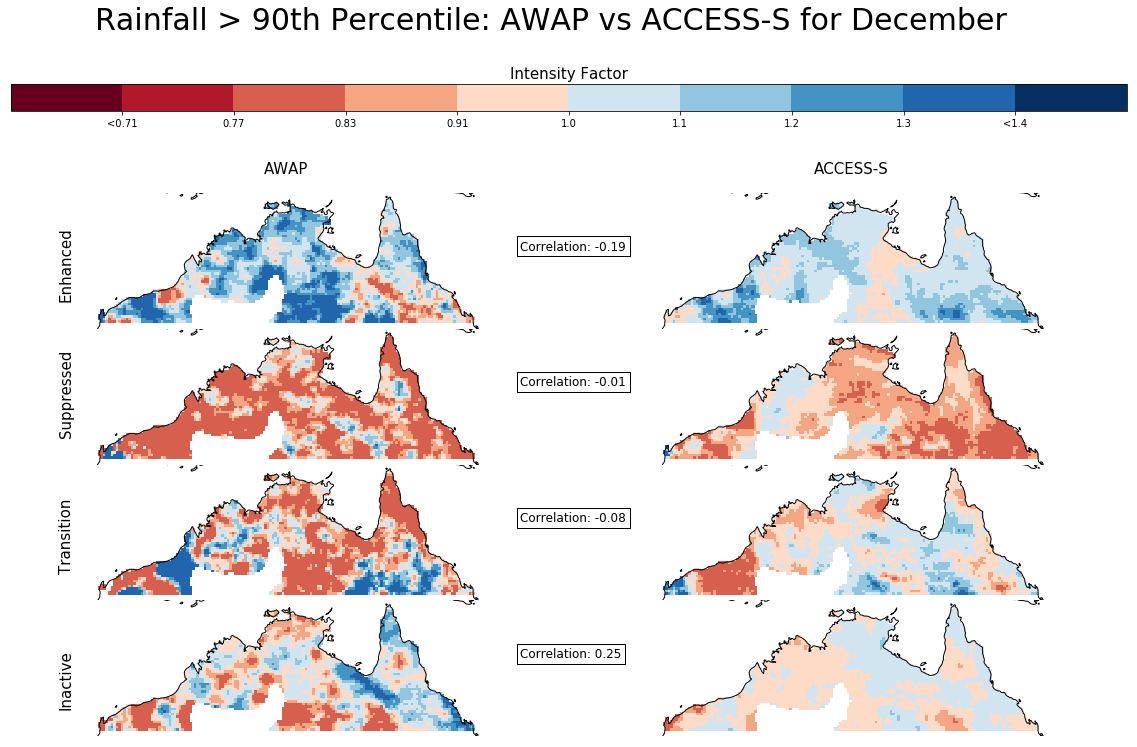

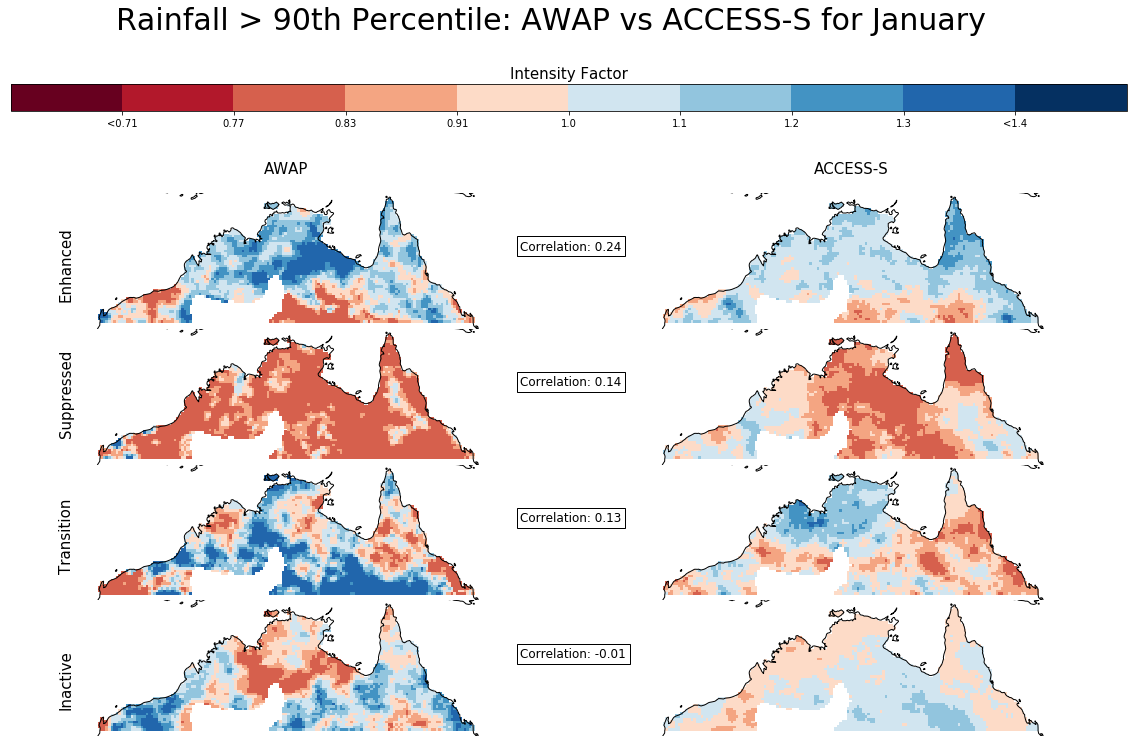

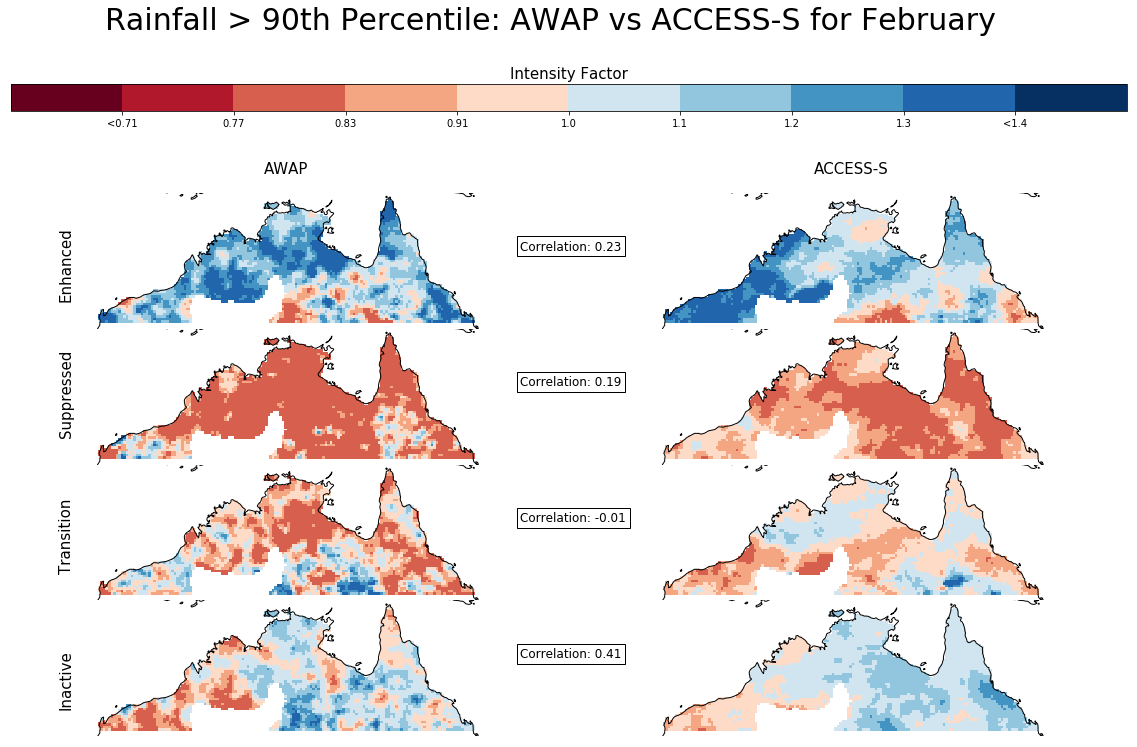

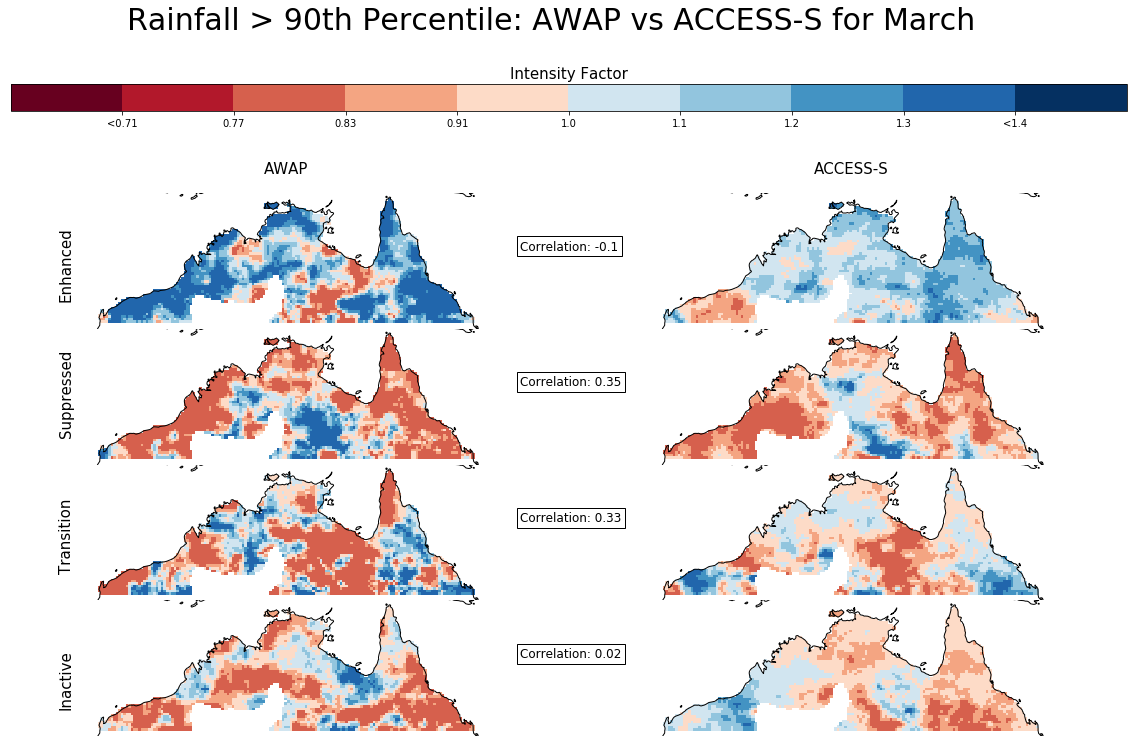

In [77]:
apf = reload(apf)

for month in [10,11,12,1,2,3]:
    apf.anomaly_plot_subphases(awap_anomaly,access_anom_mean , month = month
                              ,vmax = 1.5, cbar_title = 'Intensity Factor',
                              rain_type = 'Rainfall > 90th Percentile',
                              savedir = savedir, savefig = 1)

## Timeseries Correlations

In [80]:
af = reload(af)
pattern_correlation = af.month_pattern_correlations(awap_int, access_int_mean)

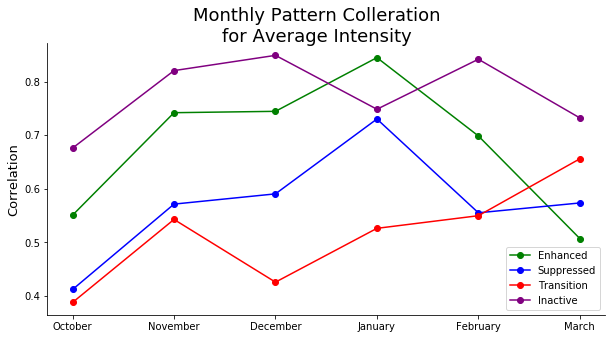

In [81]:
apf = reload(apf)

title = 'Monthly Pattern Colleration\nfor Average Intensity'

apf.timeseries_pattern_correlation_plot(pattern_correlation,title = title, custom = 0, savefig = 1, savedir = savedir)

In [82]:
af = reload(af)
anomaly_patterns = af.month_pattern_correlations(awap_anomaly,access_anom_mean)

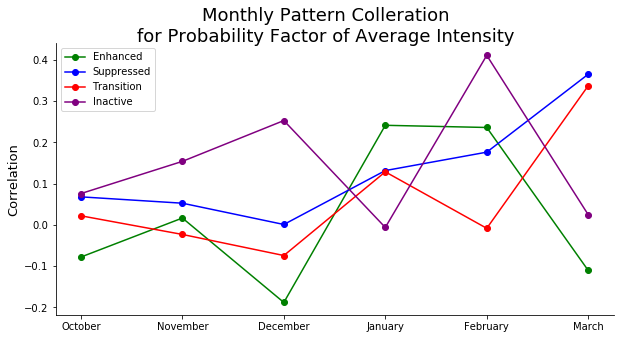

In [83]:
apf = reload(apf)

title = 'Monthly Pattern Colleration\nfor Probability Factor of Average Intensity'

apf.timeseries_pattern_correlation_plot(anomaly_patterns,title = title, custom  = 0, 
                                        savefig = 1, savedir = savedir)

<br>
Correlation of the raw count index with awap
<br> <br>
<br>


In [84]:
af = reload(af)
ensemble_raw_correlation = af. list_pattern_correlation(awap_int, int_stor)

In [85]:
import access_plot_functions_2 as afp2

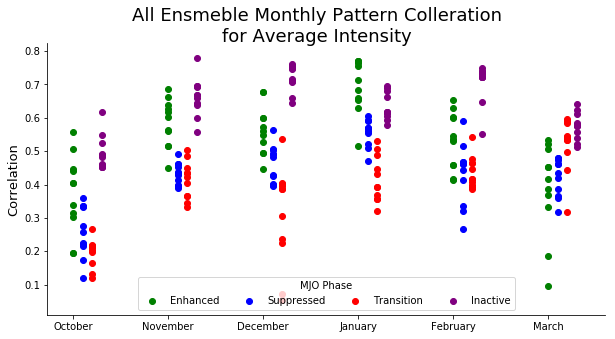

In [86]:
afp2 = reload(afp2)


title = 'All Ensmeble Monthly Pattern Colleration\nfor Average Intensity'
afp2.stacked_patter_correlation_timeseries(ensemble_raw_correlation, title = title, savefig = 1, savedir = savedir)

In [87]:
af = reload(af)
ensemble_anom_correlation = af. list_pattern_correlation(awap_anomaly, anom_stor)

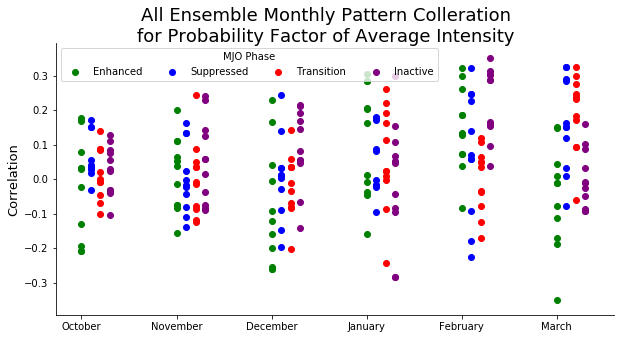

In [88]:
afp2 = reload(afp2)
title =  'All Ensemble Monthly Pattern Colleration\nfor Probability Factor of Average Intensity'
afp2.stacked_patter_correlation_timeseries(ensemble_anom_correlation, title = title,
                                           savefig = 1, savedir = savedir)